In [32]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Definisanje fuzzy ulaza
# Udaljenost od prepreke
distance_to_obstacle = ctrl.Antecedent(np.arange(0, 101, 1), 'distance_to_obstacle')
# Ugao između UAV-a i prepreke
angle_to_obstacle = ctrl.Antecedent(np.arange(-180, 181, 1), 'angle_to_obstacle')

# Definisanje fuzzy izlaza
# Promena brzine
speed_change = ctrl.Consequent(np.arange(-100, 101, 1), 'speed_change')
# Promena ugla pravca
heading_change = ctrl.Consequent(np.arange(-45, 46, 1), 'heading_change')

# Definisanje funkcija pripadnosti za udaljenost do prepreke
distance_to_obstacle['close'] = fuzz.trimf(distance_to_obstacle.universe, [0, 0, 30])
distance_to_obstacle['medium'] = fuzz.trimf(distance_to_obstacle.universe, [20, 50, 80])
distance_to_obstacle['far'] = fuzz.trimf(distance_to_obstacle.universe, [50, 100, 100])
distance_to_obstacle['very_far'] = fuzz.trimf(distance_to_obstacle.universe, [80, 100, 100])

# Definisanje funkcija pripadnosti za ugao između UAV-a i prepreke
angle_to_obstacle['neg_big'] = fuzz.trimf(angle_to_obstacle.universe, [-180, -180, -120])
angle_to_obstacle['neg_med'] = fuzz.trimf(angle_to_obstacle.universe, [-120, -90, -30])
angle_to_obstacle['neg_small'] = fuzz.trimf(angle_to_obstacle.universe, [-30, -10, 0])
angle_to_obstacle['pos_small'] = fuzz.trimf(angle_to_obstacle.universe, [0, 10, 30])
angle_to_obstacle['pos_med'] = fuzz.trimf(angle_to_obstacle.universe, [30, 90, 120])
angle_to_obstacle['pos_big'] = fuzz.trimf(angle_to_obstacle.universe, [120, 180, 180])

# Definisanje funkcija pripadnosti za promenu brzine (Speed Change)
speed_change['very_slow'] = fuzz.trimf(speed_change.universe, [-100, -100, -50])
speed_change['slow'] = fuzz.trimf(speed_change.universe, [-50, 0, 50])
speed_change['fast'] = fuzz.trimf(speed_change.universe, [50, 100, 100])
speed_change['very_fast'] = fuzz.trimf(speed_change.universe, [75, 100, 100])

# Definisanje funkcija pripadnosti za promenu ugla pravca (Heading Change)
heading_change['neg_big'] = fuzz.trimf(heading_change.universe, [-45, -45, -15])
heading_change['neg_med'] = fuzz.trimf(heading_change.universe, [-15, -10, 0])
heading_change['neg_small'] = fuzz.trimf(heading_change.universe, [-5, 0, 0])
heading_change['zero'] = fuzz.trimf(heading_change.universe, [-1, 0, 1])
heading_change['pos_small'] = fuzz.trimf(heading_change.universe, [0, 5, 15])
heading_change['pos_med'] = fuzz.trimf(heading_change.universe, [10, 15, 45])
heading_change['pos_big'] = fuzz.trimf(heading_change.universe, [15, 45, 45])

# Pravila fuzzy sistema
rule11 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['pos_med'], 
                   (speed_change['very_fast'], heading_change['zero']))
rule12 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['pos_small'], 
                   (speed_change['fast'], heading_change['neg_small']))
rule13 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['neg_small'], 
                   (speed_change['fast'], heading_change['pos_small']))
rule14 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['neg_med'], 
                   (speed_change['very_fast'], heading_change['zero']))
rule15 = ctrl.Rule(distance_to_obstacle['medium'] & angle_to_obstacle['pos_big'], 
                   (speed_change['fast'], heading_change['zero']))

rule16 = ctrl.Rule(distance_to_obstacle['medium'] & angle_to_obstacle['pos_med'], 
                   (speed_change['slow'], heading_change['neg_small']))
rule17 = ctrl.Rule(distance_to_obstacle['medium'] & angle_to_obstacle['pos_small'], 
                   (speed_change['slow'], heading_change['neg_med']))
rule18 = ctrl.Rule(distance_to_obstacle['medium'] & angle_to_obstacle['neg_small'], 
                   (speed_change['slow'], heading_change['pos_med']))
rule19 = ctrl.Rule(distance_to_obstacle['medium'] & angle_to_obstacle['neg_med'], 
                   (speed_change['slow'], heading_change['pos_small']))

rule20 = ctrl.Rule(distance_to_obstacle['close'] & angle_to_obstacle['pos_big'], 
                   (speed_change['slow'], heading_change['neg_small']))
rule21 = ctrl.Rule(distance_to_obstacle['close'] & angle_to_obstacle['pos_med'], 
                   (speed_change['very_slow'], heading_change['neg_med']))
rule22 = ctrl.Rule(distance_to_obstacle['close'] & angle_to_obstacle['pos_small'], 
                   (speed_change['very_slow'], heading_change['neg_big']))
rule23 = ctrl.Rule(distance_to_obstacle['close'] & angle_to_obstacle['neg_small'], 
                   (speed_change['very_slow'], heading_change['pos_big']))
rule24 = ctrl.Rule(distance_to_obstacle['close'] & angle_to_obstacle['neg_med'], 
                   (speed_change['very_slow'], heading_change['pos_med']))
rule25 = ctrl.Rule(distance_to_obstacle['close'] & angle_to_obstacle['neg_big'], 
                   (speed_change['slow'], heading_change['pos_small']))

# Kreiranje fuzzy sistema
uav_ctrl = ctrl.ControlSystem([rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
uav_simulation = ctrl.ControlSystemSimulation(uav_ctrl)

# Primer ulaza
uav_simulation.input['distance_to_obstacle'] = 35  # udaljenost do prepreke (blizu)
uav_simulation.input['angle_to_obstacle'] = 45     # ugao u odnosu na prepreku

# Izvršavanje fuzzy sistema
uav_simulation.compute()

# Ispis rezultata simulacije
print(f"Predložena promena brzine: {uav_simulation.output['speed_change']:.2f}")
print(f"Predložena promena ugla pravca: {uav_simulation.output['heading_change']:.2f}")


Predložena promena brzine: -0.00
Predložena promena ugla pravca: -1.76


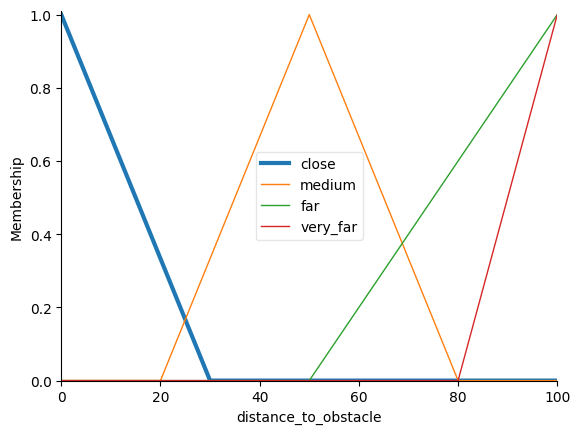

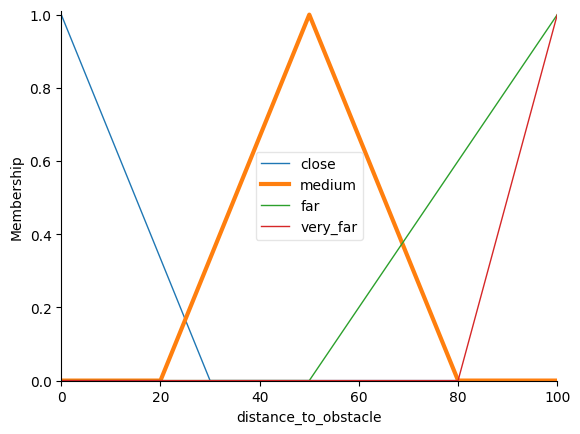

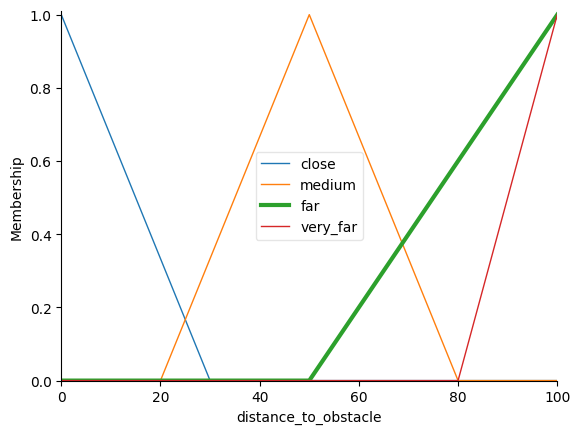

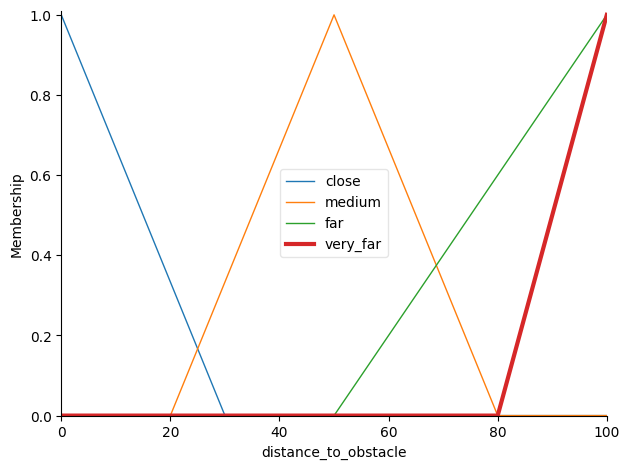

In [33]:
# Distance to Obstacle
distance_to_obstacle['close'].view(ax=axs[0])
distance_to_obstacle['medium'].view(ax=axs[0])
distance_to_obstacle['far'].view(ax=axs[0])
distance_to_obstacle['very_far'].view(ax=axs[0])
axs[0].set_title('Distance to Obstacle')
plt.tight_layout()
plt.show()

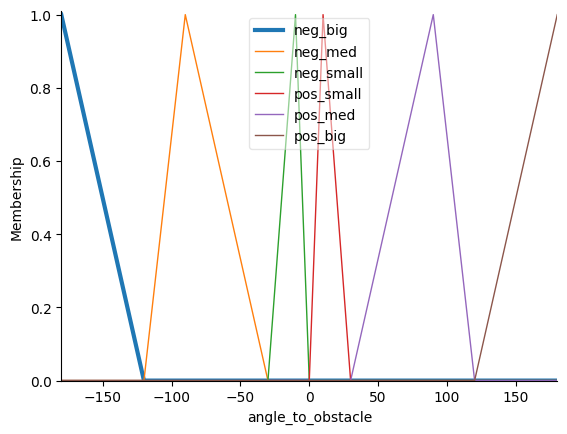

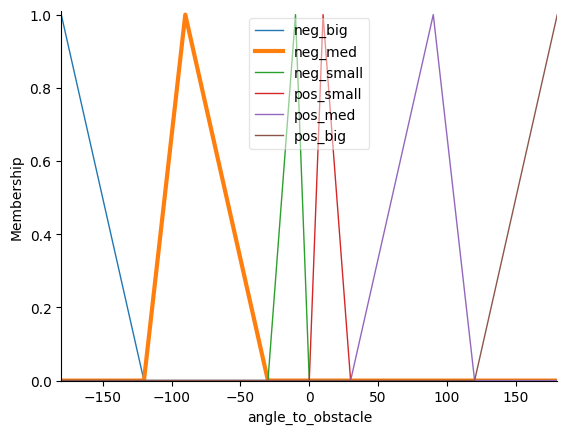

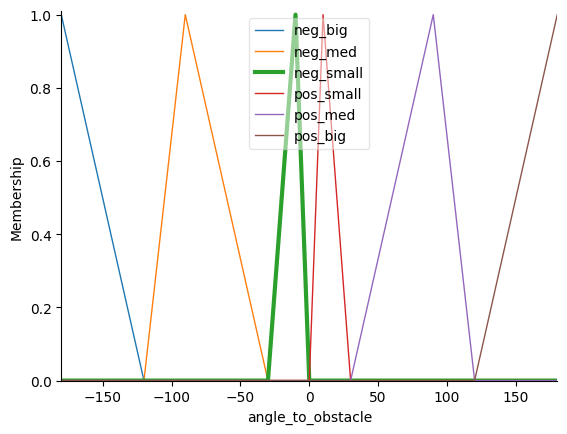

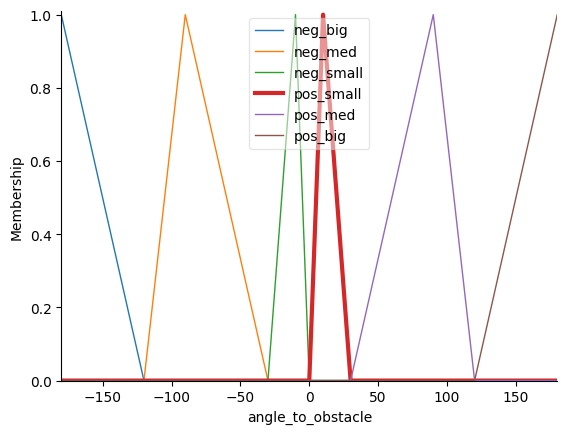

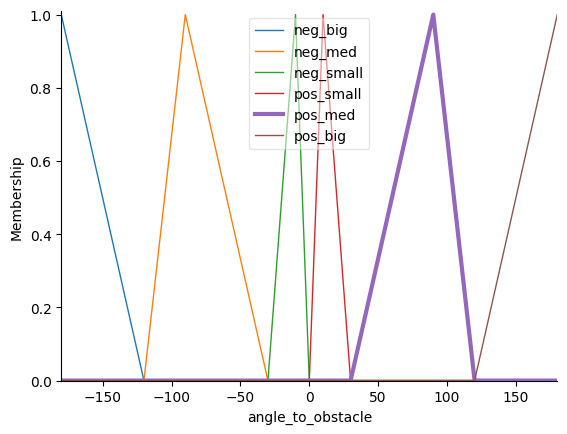

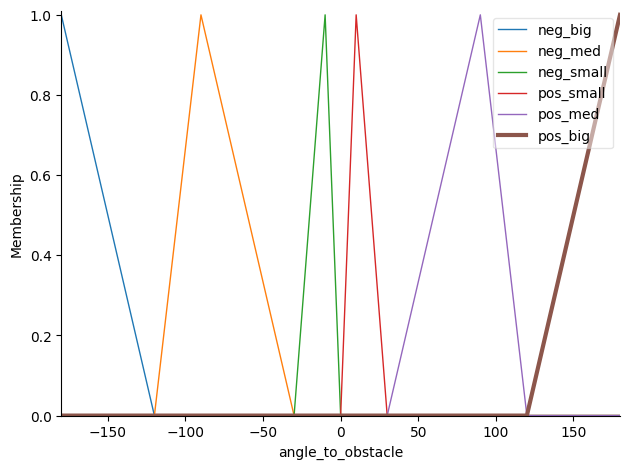

In [34]:
# Angle to Obstacle
angle_to_obstacle['neg_big'].view(ax=axs[1])
angle_to_obstacle['neg_med'].view(ax=axs[1])
angle_to_obstacle['neg_small'].view(ax=axs[1])
angle_to_obstacle['pos_small'].view(ax=axs[1])
angle_to_obstacle['pos_med'].view(ax=axs[1])
angle_to_obstacle['pos_big'].view(ax=axs[1])
axs[1].set_title('Angle to Obstacle')
plt.tight_layout()
plt.show()

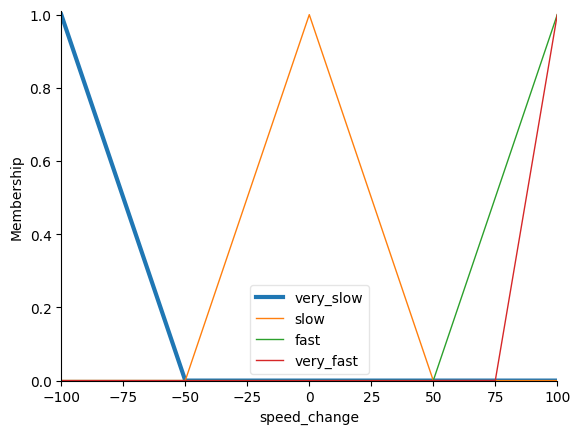

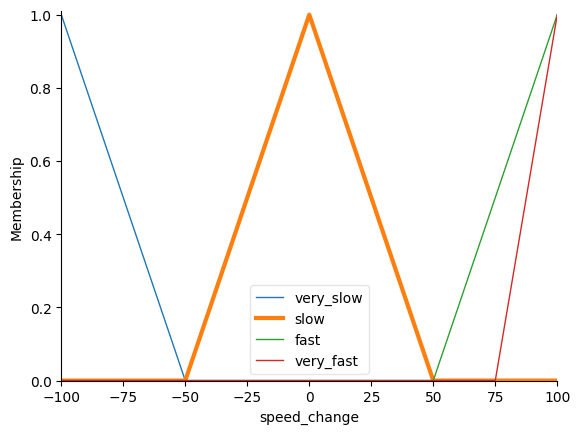

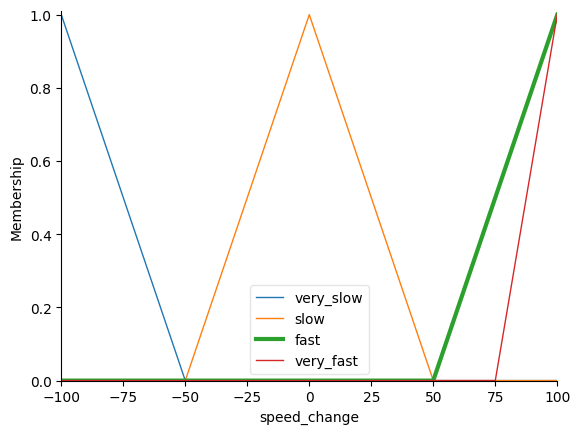

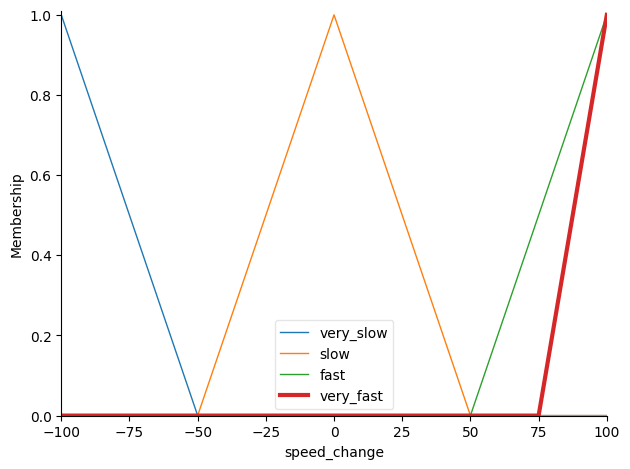

In [35]:
# Speed Change
speed_change['very_slow'].view(ax=axs[2])
speed_change['slow'].view(ax=axs[2])
speed_change['fast'].view(ax=axs[2])
speed_change['very_fast'].view(ax=axs[2])
axs[2].set_title('Speed Change')
plt.tight_layout()
plt.show()

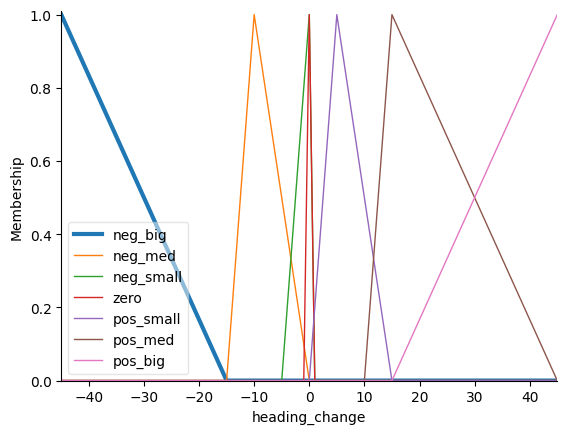

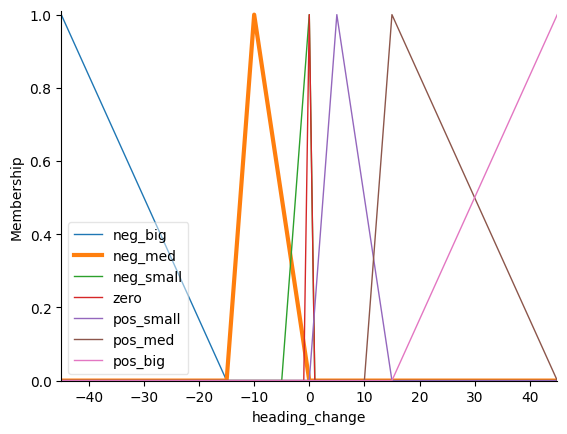

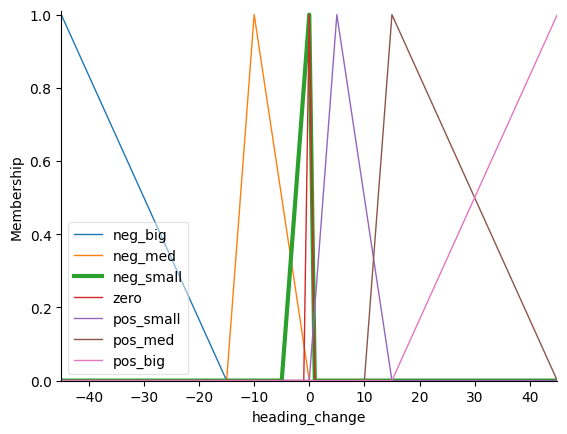

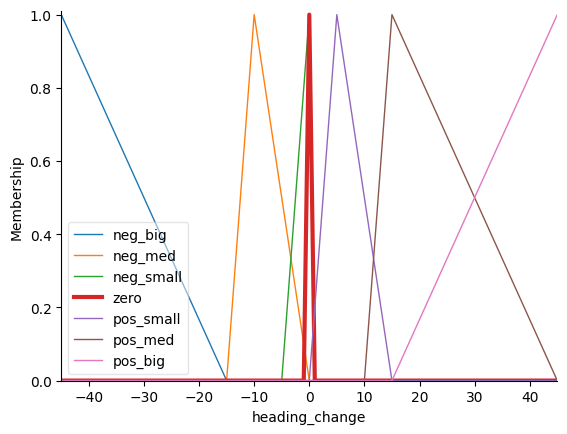

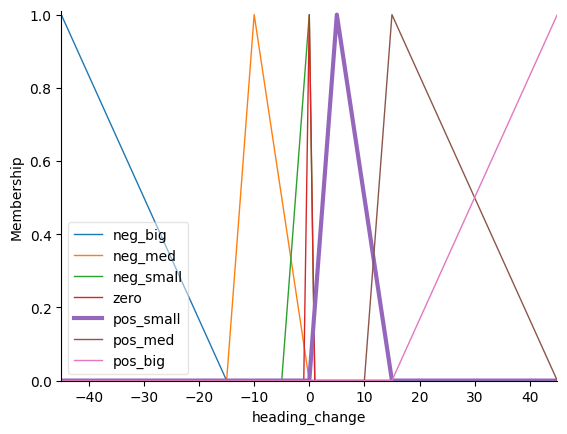

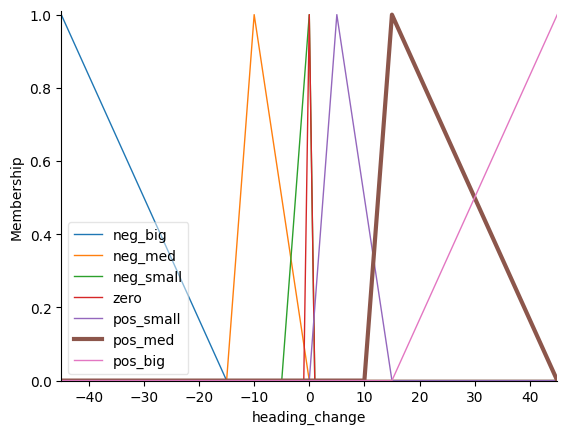

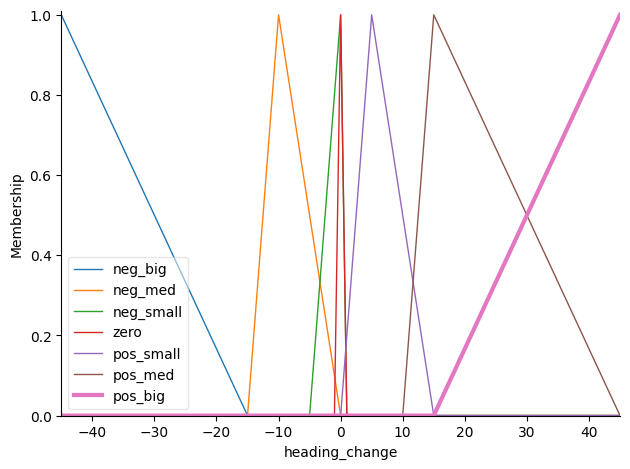

In [36]:
# Heading Change
heading_change['neg_big'].view(ax=axs[3])
heading_change['neg_med'].view(ax=axs[3])
heading_change['neg_small'].view(ax=axs[3])
heading_change['zero'].view(ax=axs[3])
heading_change['pos_small'].view(ax=axs[3])
heading_change['pos_med'].view(ax=axs[3])
heading_change['pos_big'].view(ax=axs[3])
axs[3].set_title('Heading Change')

plt.tight_layout()
plt.show()